In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

In [2]:
file_path ='D:/Thesis/files_output_dir/output_files/'
output_dir = 'D:/Thesis/files_output_dir/output_utilization/'

In [3]:
level1_road_history_workday_utility = pd.read_csv(output_dir + 'level1_road_history_workday_utilization_tune.csv')
level2_road_history_workday_utility = pd.read_csv(output_dir + 'level2_road_history_workday_utilization_tune.csv')
level3_road_history_workday_utility = pd.read_csv(output_dir + 'level3_road_history_workday_utilization_tune.csv')

level1_road_history_holiday_utility = pd.read_csv(output_dir + 'level1_road_history_holiday_utilization_tune.csv')
level2_road_history_holiday_utility = pd.read_csv(output_dir + 'level2_road_history_holiday_utilization_tune.csv')
level3_road_history_holiday_utility = pd.read_csv(output_dir + 'level3_road_history_holiday_utilization_tune.csv')


file path D:/Thesis/files_output_dir/output_utilization/level1_road_history_workday_utilization_tune.csv
file path D:/Thesis/files_output_dir/output_utilization/level2_road_history_workday_utilization_tune.csv
file path D:/Thesis/files_output_dir/output_utilization/level3_road_history_workday_utilization_tune.csv


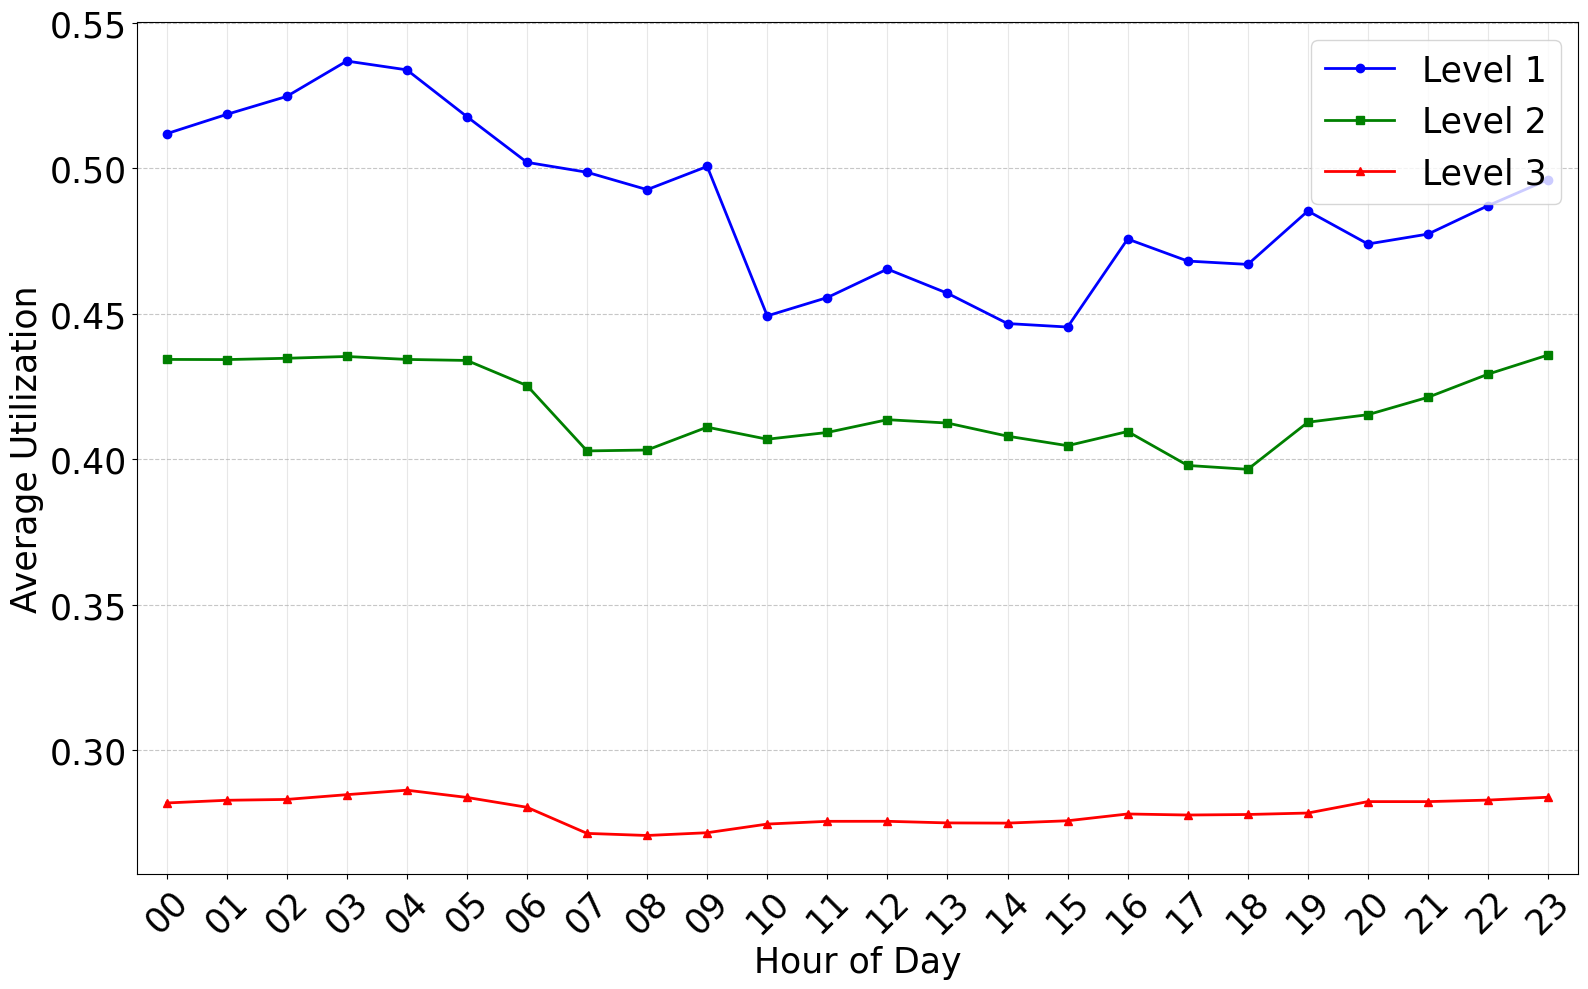

Workday plot saved to D:/Thesis/files_output_dir/output_utilization/visualizations/utilization//workday_utilization_comparison_hourly.png
file path D:/Thesis/files_output_dir/output_utilization/level1_road_history_holiday_utilization_tune.csv
file path D:/Thesis/files_output_dir/output_utilization/level2_road_history_holiday_utilization_tune.csv
file path D:/Thesis/files_output_dir/output_utilization/level3_road_history_holiday_utilization_tune.csv


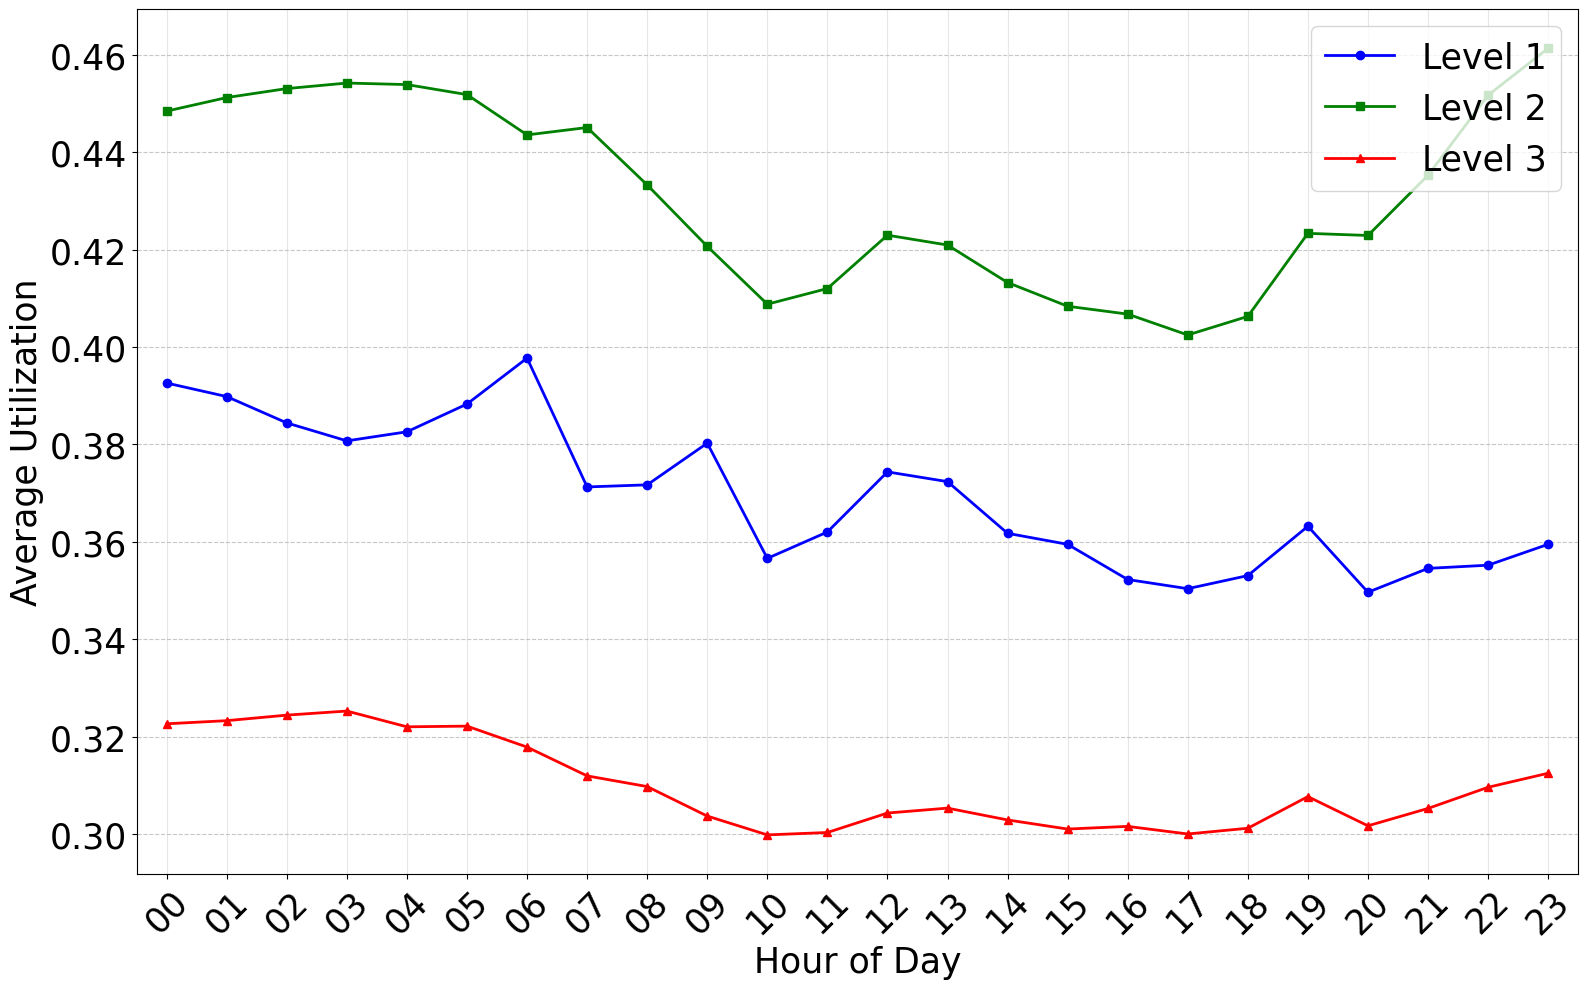

Holiday plot saved to D:/Thesis/files_output_dir/output_utilization/visualizations/utilization//holiday_utilization_comparison_hourly.png


In [5]:
def plot_utilization_comparison(workday_files, holiday_files, fig_path, font_size=12):
    """
    Plot road utilization comparison for workdays and holidays using hourly mean values.
    """
    # Set matplotlib parameters for better rendering
    plt.rcParams['agg.path.chunksize'] = 10000
    plt.rcParams['path.simplify'] = True
    plt.rcParams['path.simplify_threshold'] = 0.5

    def process_data(file_path):
        """Helper function to read and process data with hourly aggregation"""
        print("file path",file_path)
        try:
            # Read CSV
            df = pd.read_csv(file_path)
            
            # Convert time slots to hours
            df['hour'] = df['time'] // 6
            
            # Group by hour and calculate mean utilization
            hourly_data = df.groupby('hour')['utilization'].mean().reset_index()
            
            # Format hour as string with leading zeros
            hourly_data['hour_str'] = hourly_data['hour'].apply(lambda x: f'{x:02}')
            
            return hourly_data
            
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            return pd.DataFrame()

    # Styles for different levels
    styles = {
        1: {'color': 'blue', 'marker': 'o', 'label': 'Level 1', 'markersize': 6},
        2: {'color': 'green', 'marker': 's', 'label': 'Level 2', 'markersize': 6},
        3: {'color': 'red', 'marker': '^', 'label': 'Level 3', 'markersize': 6}
    }

    # Process and plot workday data
    fig, ax1 = plt.subplots(figsize=(16, 10), dpi=100)

    for level in [1, 2, 3]:
        hourly_data = process_data(workday_files[level])
        if not hourly_data.empty:
            ax1.plot(hourly_data['hour_str'], 
                     hourly_data['utilization'],
                     color=styles[level]['color'],
                     marker=styles[level]['marker'],
                     label=styles[level]['label'],
                     markersize=styles[level]['markersize'],
                     linewidth=2)

    ax1.set_xlabel('Hour of Day', fontsize=font_size)
    ax1.set_ylabel('Average Utilization', fontsize=font_size)
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right', fontsize=font_size)
    ax1.tick_params(axis='x', rotation=45, labelsize=font_size)
    ax1.tick_params(axis='y', labelsize=font_size)
    
    # Set x-axis limits and ticks for 24-hour format
    ax1.set_xlim(-0.5, 23.5)
    ax1.set_xticks(range(24))
    
    ax1.yaxis.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Save the workday plot figure
    if fig_path:
        try:
            fig.savefig(os.path.join(fig_path, 'workday_utilization_comparison_hourly.png'), 
                        dpi=300,
                        bbox_inches='tight',
                        format='png')
            print(f"Workday plot saved to {fig_path}/workday_utilization_comparison_hourly.png")
        except Exception as e:
            print(f"Error saving workday figure: {str(e)}")

    # Process and plot holiday data
    fig, ax2 = plt.subplots(figsize=(16, 10), dpi=100)

    for level in [1, 2, 3]:
        hourly_data = process_data(holiday_files[level])
        if not hourly_data.empty:
            ax2.plot(hourly_data['hour_str'], 
                     hourly_data['utilization'],
                     color=styles[level]['color'],
                     marker=styles[level]['marker'],
                     label=styles[level]['label'],
                     markersize=styles[level]['markersize'],
                     linewidth=2)

    ax2.set_xlabel('Hour of Day', fontsize=font_size)
    ax2.set_ylabel('Average Utilization', fontsize=font_size)
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right', fontsize=font_size)
    ax2.tick_params(axis='x', rotation=45, labelsize=font_size)
    ax2.tick_params(axis='y', labelsize=font_size)
    
    # Set x-axis limits and ticks for 24-hour format
    ax2.set_xlim(-0.5, 23.5)
    ax2.set_xticks(range(24))
    
    ax2.yaxis.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Save the holiday plot figure
    if fig_path:
        try:
            fig.savefig(os.path.join(fig_path, 'holiday_utilization_comparison_hourly.png'), 
                        dpi=300,
                        bbox_inches='tight',
                        format='png')
            print(f"Holiday plot saved to {fig_path}/holiday_utilization_comparison_hourly.png")
        except Exception as e:
            print(f"Error saving holiday figure: {str(e)}")

# Example usage:
if __name__ == "__main__":
    workday_files = {
        1: output_dir + 'level1_road_history_workday_utilization_tune.csv',
        2: output_dir + 'level2_road_history_workday_utilization_tune.csv',
        3: output_dir + 'level3_road_history_workday_utilization_tune.csv'
    }
    
    holiday_files = {
        1: output_dir + 'level1_road_history_holiday_utilization_tune.csv',
        2: output_dir + 'level2_road_history_holiday_utilization_tune.csv',
        3: output_dir + 'level3_road_history_holiday_utilization_tune.csv'
    }
    
    font_size = 25
    fig_path = 'D:/Thesis/files_output_dir/output_utilization/visualizations/utilization/'
    plot_utilization_comparison(workday_files, holiday_files, fig_path, font_size)


In [4]:
level1_road_history_workday_utility.head()

,road_id,sum_poi,weighted_POI,time,avg_speed,theta,volume,qc,vc,Uq,Uv,Uq_norm,Uv_norm,theta_norm,utilization,inv_utilization
0,129,0,0.0,55,9.392215,1.0,33.5,33.5,10.122607,1.00000,0.927845,0.288747,0.310658,0.5,0.481876,2.075224
1,129,0,0.0,61,7.426522,1.0,13.6,33.5,10.122607,0.40597,0.733657,0.000000,0.245640,0.5,0.370553,2.698668
2,129,0,0.0,63,7.714734,1.0,33.5,33.5,10.122607,1.00000,0.762129,0.288747,0.255173,0.5,0.460988,2.169255
3,129,0,0.0,79,6.754791,1.0,13.6,33.5,10.122607,0.40597,0.667298,0.000000,0.223422,0.5,0.361375,2.767209
4,129,0,0.0,91,5.377924,1.0,13.6,33.5,10.122607,0.40597,0.531279,0.000000,0.177881,0.5,0.341008,2.932479


In [35]:
level1_road_history_workday_utility['road_id'].value_counts()[lambda x: x > 143]

road_id
31141    144
51584    144
31934    144
31935    144
31958    144
        ... 
15549    144
15548    144
15531    144
22306    144
22316    144
Name: count, Length: 2179, dtype: int64

In [4]:
df = level1_road_history_workday_utility
df = df[df['time'].isin(range(48, 50))]
# df = df[df['road_id']==31141]
df.head()

,road_id,sum_poi,weighted_POI,time,avg_speed,theta,volume,qc,vc,Uq,Uv,Uq_norm,Uv_norm,theta_norm,utilization,inv_utilization
17,130,0,0.0,48,19.284399,0.0,39.15,57.65,17.667591,0.679098,1.091513,0.132763,0.365456,0.0,0.281641,3.550623
18,130,0,0.0,49,21.650394,0.0,27.20,57.65,17.667591,0.471813,1.225430,0.032005,0.410294,0.0,0.265818,3.761969
52,131,0,0.0,48,28.674617,0.0,27.20,67.00,22.872709,0.405970,1.253661,0.000000,0.419746,0.0,0.259151,3.858750
114,179,0,0.0,49,24.586187,0.0,27.20,67.00,25.805855,0.405970,0.952737,0.000000,0.318992,0.0,0.225917,4.426396
162,180,1,1.1,48,23.925244,0.0,50.55,57.65,25.373714,0.876843,0.942915,0.228883,0.315703,0.0,0.293415,3.408145


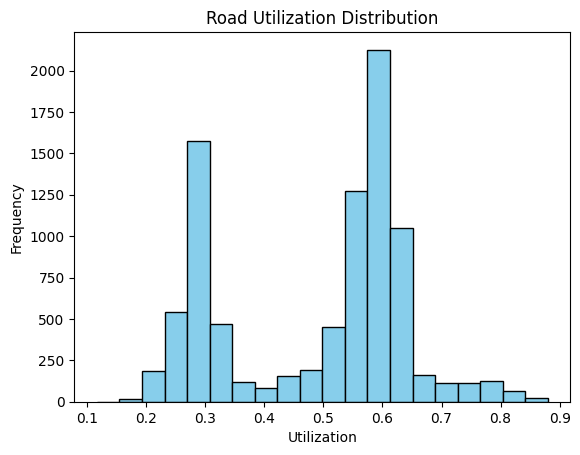

In [5]:
# Plot histogram of utilization
plt.hist(df['utilization'], bins=20, edgecolor='black', color='skyblue')
plt.title("Road Utilization Distribution")
plt.xlabel("Utilization")
plt.ylabel("Frequency")
plt.show()

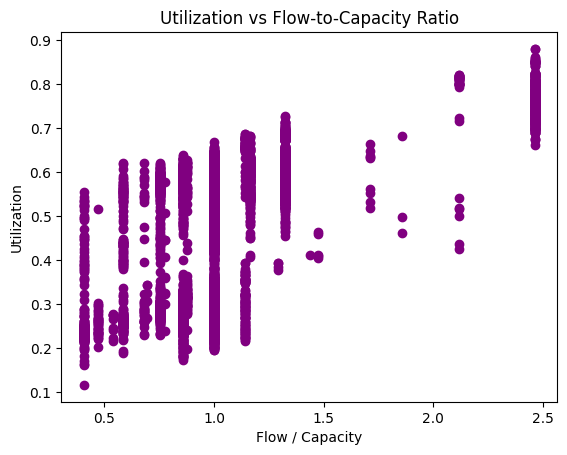

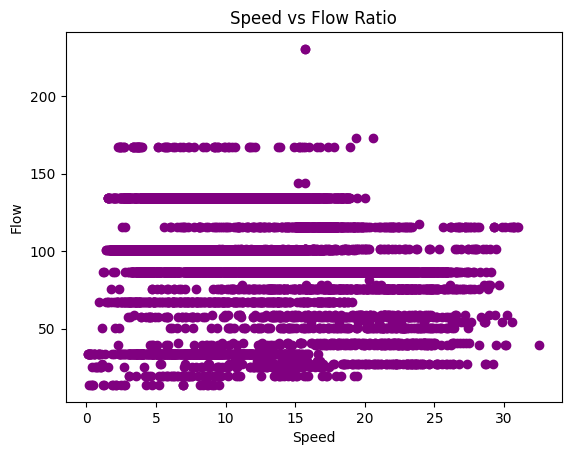

In [9]:
# Scatter plot of traffic flow / capacity (Uq) vs utilization
plt.scatter(df['Uq'], df['utilization'], color='purple')
plt.title('Utilization vs Flow-to-Capacity Ratio')
plt.xlabel('Flow / Capacity')
plt.ylabel('Utilization')
plt.show()

plt.scatter(df['avg_speed'], df['volume'], color='purple')
plt.title('Speed vs Flow Ratio')
plt.xlabel('Speed')
plt.ylabel('Flow')
plt.show()

utilization    1.000000
Uq             0.588922
Uv            -0.169026
theta          0.939889
Name: utilization, dtype: float64


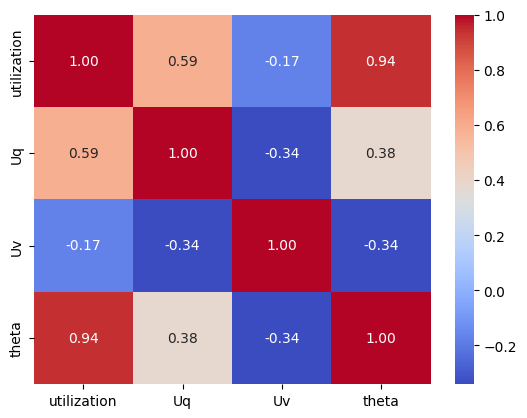

In [6]:
# Correlation analysis
correlations = df[['utilization', 'Uq', 'Uv', 'theta']].corr()

# Print correlation of 'utilization' with others
print(correlations['utilization'])

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
plt.show()

C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_2532\2213823390.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[data_before_vc.index, 'predicted_utilization_before_vc'] = predicted_before_vc
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_2532\2213823390.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[data_after_vc.index, 'predicted_utilization_after_vc'] = predicted_after_vc


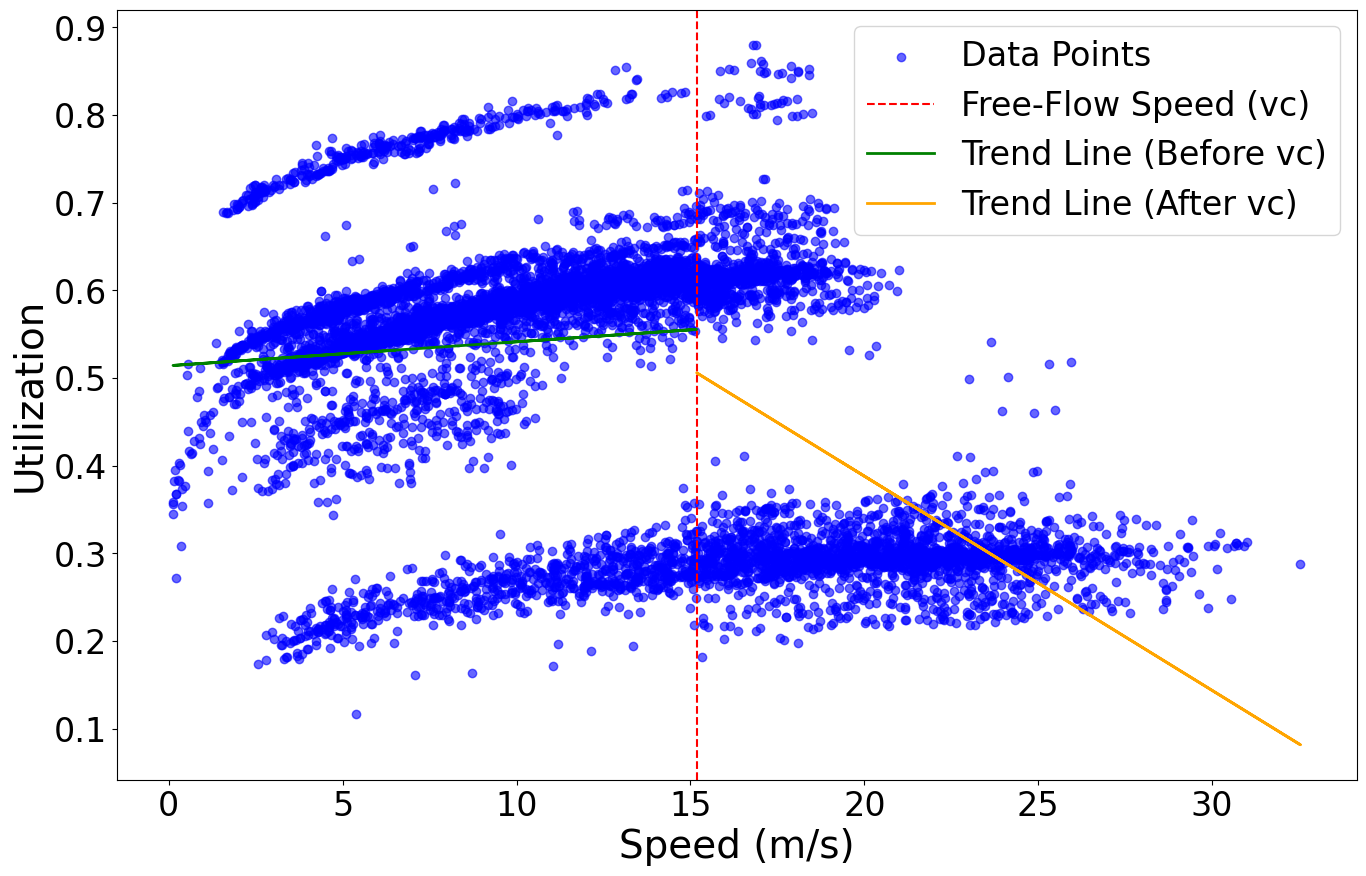

High Utilization Outliers with Speeds above Free-Flow Speed:
        avg_speed  utilization         vc
2230    18.219795     0.629048  16.608144
2231    18.780076     0.632747  16.608144
2374    15.772587     0.648911  12.282251
2375    16.885353     0.658005  12.282251
22854   15.744961     0.623906  14.980906
...           ...          ...        ...
573037  17.251570     0.630014  15.600952
573038  18.509947     0.638734  15.600952
573282  17.041772     0.632487  15.102754
573283  16.891713     0.631402  15.102754
574268  18.419400     0.626241  17.185698

[299 rows x 3 columns]
Slope of the regression line before vc: 0.0027
Slope of the regression line after vc: -0.0244


In [7]:
df = level1_road_history_workday_utility
df = df[df['time'].isin(range(48, 50))]

# Assuming df is your DataFrame and contains 'avg_speed', 'utilization', and 'vc' columns
# Sample data (replace with your actual DataFrame)
# df = pd.read_csv("your_data.csv")

# Determine the break point (vc)
vc = df['vc'].mean()

# Split data into two parts based on vc (free-flow speed)
data_before_vc = df[df['avg_speed'] <= vc]
data_after_vc = df[df['avg_speed'] > vc]

# Fit linear regression for the first segment (before vc)
model_before_vc = LinearRegression()
model_before_vc.fit(data_before_vc[['avg_speed']], data_before_vc['utilization'])
predicted_before_vc = model_before_vc.predict(data_before_vc[['avg_speed']])

# Fit linear regression for the second segment (after vc)
model_after_vc = LinearRegression()
model_after_vc.fit(data_after_vc[['avg_speed']], data_after_vc['utilization'])
predicted_after_vc = model_after_vc.predict(data_after_vc[['avg_speed']])

# Now, assign the predictions back to the relevant rows in the original DataFrame

# For data before vc, update the relevant rows in df
df.loc[data_before_vc.index, 'predicted_utilization_before_vc'] = predicted_before_vc

# For data after vc, update the relevant rows in df
df.loc[data_after_vc.index, 'predicted_utilization_after_vc'] = predicted_after_vc

# Plotting
plt.figure(figsize=(16, 10))

# Scatter plot of the data points
plt.scatter(df['avg_speed'], df['utilization'], color='blue', alpha=0.6, label='Data Points')

# Vertical line at vc (free-flow speed)
plt.axvline(vc, color='red', linestyle='--', label='Free-Flow Speed (vc)')

# Plot the trend line before vc
plt.plot(data_before_vc['avg_speed'], df.loc[data_before_vc.index, 'predicted_utilization_before_vc'],
         color='green', label='Trend Line (Before vc)', linewidth=2)

# Plot the trend line after vc
plt.plot(data_after_vc['avg_speed'], df.loc[data_after_vc.index, 'predicted_utilization_after_vc'],
         color='orange', label='Trend Line (After vc)', linewidth=2)

# Labels and legend
plt.xlabel('Speed (m/s)', fontsize=28)
plt.ylabel('Utilization', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=24)

# Display the plot
plt.show()

# Investigate outliers: points with higher utilization at higher speeds (above free-flow)
outliers = df[df['avg_speed'] > vc]
high_utilization_outliers = outliers[outliers['utilization'] > outliers['utilization'].quantile(0.9)]

print("High Utilization Outliers with Speeds above Free-Flow Speed:")
print(high_utilization_outliers[['avg_speed', 'utilization', 'vc']])

# Optional: Print the slopes of the regression lines
print(f"Slope of the regression line before vc: {model_before_vc.coef_[0]:.4f}")
print(f"Slope of the regression line after vc: {model_after_vc.coef_[0]:.4f}")


utilization    1.000000
Uq             0.588922
Uv            -0.169026
theta          0.939889
Name: utilization, dtype: float64


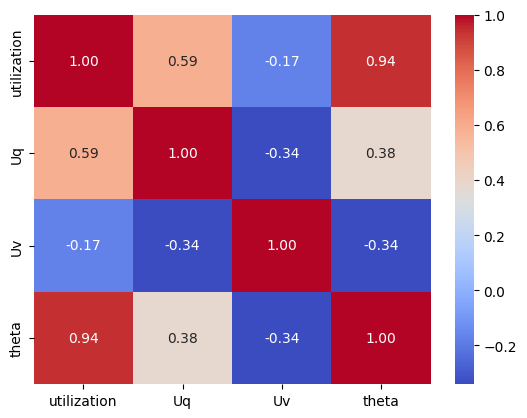

In [13]:
# Correlation analysis
correlations = df[['utilization', 'Uq', 'Uv', 'theta']].corr()

# Print correlation of 'utilization' with others
print(correlations['utilization'])

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
plt.show()

Plot saved to D:/Thesis/files_output_dir/output_utilization//speed_utilization_analysis.png


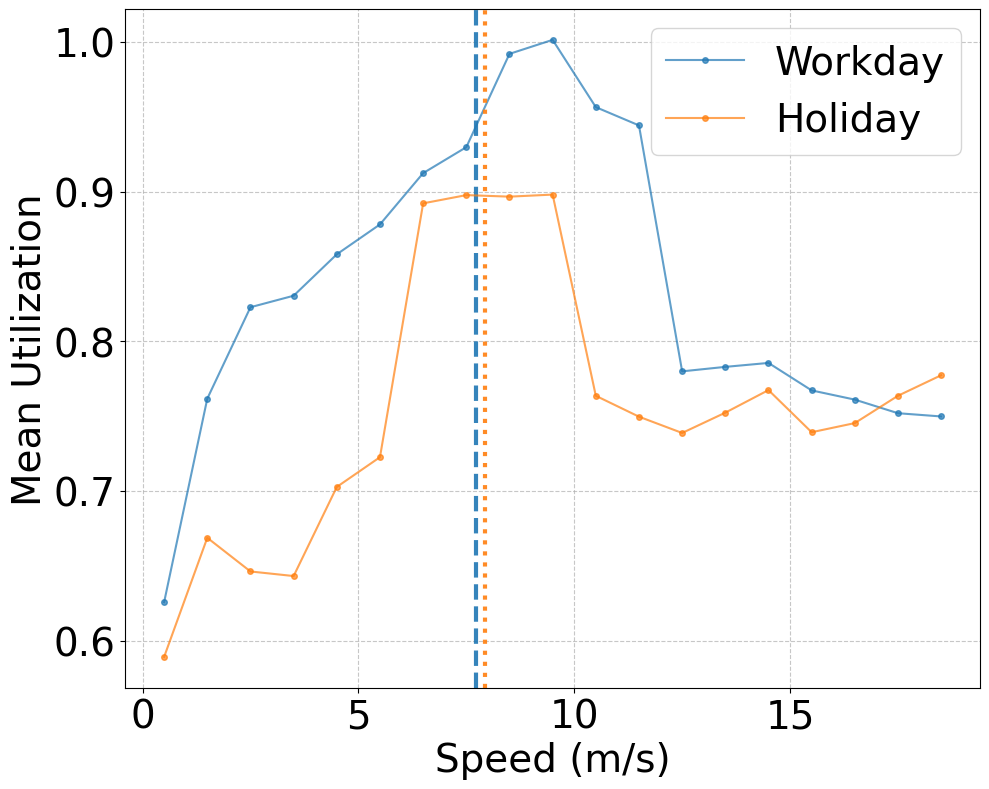

In [12]:
def analyze_speed_utilization(workday_files, holiday_files, output_dir=None, font_size=12):
    """
    Analyze and plot speed vs. utilization relationships for all road levels.
    """
    # Create a single plot for both workday and holiday data
    # plt.xticks(font_size)
    # plt.yticks(font_size)
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Define colors for day types
    colors = {'workday': '#1f77b4', 'holiday': '#ff7f0e'}  # Blue for workday, Orange for holiday

    def process_file_in_chunks(file_path, chunk_size=100000):
        """Process large CSV files in chunks"""
        speed_bins = np.arange(0, 20, 1)  # Assuming max speed around 40 m/s
        utilization_sum = np.zeros(len(speed_bins) - 1)
        count = np.zeros(len(speed_bins) - 1)
        free_flow_sum = 0
        free_flow_count = 0
        
        try:
            for chunk in pd.read_csv(file_path, chunksize=chunk_size):
                # Process speed vs utilization
                for i in range(len(speed_bins) - 1):
                    mask = (chunk['avg_speed'] >= speed_bins[i]) & (chunk['avg_speed'] < speed_bins[i + 1])
                    utilization_sum[i] += chunk.loc[mask, 'utilization'].sum()
                    count[i] += mask.sum()
                
                # Process free-flow speed
                free_flow_sum += chunk['vc'].sum()
                free_flow_count += len(chunk)
                
            # Calculate means
            mean_utilization = np.divide(utilization_sum, count, where=count > 0)
            mean_free_flow = free_flow_sum / free_flow_count if free_flow_count > 0 else 0
            
            return {
                'speed_bins': speed_bins[:-1] + 0.5,  # bin centers
                'mean_utilization': mean_utilization,
                'mean_free_flow': mean_free_flow,
                'valid_bins': count > 0
            }
            
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            return None

    # Process data for workday and holiday files
    for day_type, files in [('workday', workday_files), ('holiday', holiday_files)]:
        utilization_data = {}
        
        # Only consider levels 1 and 2 cumulatively
        for level in [1, 2]:
            if level not in files:
                print(f"Missing file for level {level} on {day_type}")
                continue
            
            file_path = files.get(level)
            if not file_path or not pd.io.common.file_exists(file_path):
                print(f"File not found for level {level} on {day_type}: {file_path}")
                continue
            
            data = process_file_in_chunks(file_path)
            if data is None:
                print(f"No data found for level {level} on {day_type}")
                continue
            
            # Get valid data points
            valid_mask = data['valid_bins']
            speed_bins = data['speed_bins'][valid_mask]
            mean_util = data['mean_utilization'][valid_mask]
            
            if level not in utilization_data:
                utilization_data[level] = {'speed_bins': speed_bins, 'mean_utilization': mean_util}
            else:
                utilization_data[level]['mean_utilization'] += mean_util
        
        # Check if both levels 1 and 2 have data
        if 1 in utilization_data and 2 in utilization_data:
            # Interpolate level 2's data to match the speed bins of level 1
            level_1_speed_bins = utilization_data[1]['speed_bins']
            level_1_utilization = utilization_data[1]['mean_utilization']
            
            level_2_speed_bins = utilization_data[2]['speed_bins']
            level_2_utilization = utilization_data[2]['mean_utilization']
            
            # Interpolate level 2 data to match level 1's speed bins
            level_2_utilization_interp = np.interp(level_1_speed_bins, level_2_speed_bins, level_2_utilization)
            
            # Combine level 1 and level 2 utilization
            combined_utilization = level_1_utilization + level_2_utilization_interp
            
            # Plot combined data for levels 1 and 2
            ax.plot(level_1_speed_bins, combined_utilization, 
                    c=colors[day_type], marker='o', markersize=4,
                    label=f'{day_type.capitalize()}', alpha=0.7)
            
            # Add free-flow speed line with the appropriate color
            linestyle = '--' if day_type == 'workday' else ':'
            ax.axvline(data['mean_free_flow'], color=colors[day_type], linestyle=linestyle, alpha=0.9, linewidth=3)
        else:
            print(f"Data missing for one or more levels (1 or 2) for {day_type.capitalize()}")

    # Configure plot with the passed font_size variable
    # ax.set_title('Speed vs. Utilization (Level 1 & 2, Workday and Holiday)', fontsize=font_size, pad=15)
    ax.set_xlabel('Speed (m/s)', fontsize=font_size)
    ax.set_ylabel('Mean Utilization', fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.legend(fontsize=font_size)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Adjust layout and display
    plt.tight_layout()
    
    # Save figure if output directory is provided
    if output_dir:
        try:
            plt.savefig(f'{output_dir}/speed_utilization_analysis.png', 
                       dpi=300, bbox_inches='tight', format='png')
            print(f"Plot saved to {output_dir}/speed_utilization_analysis.png")
        except Exception as e:
            print(f"Error saving figure: {str(e)}")
    
    plt.show()



# Example usage:
if __name__ == "__main__":
    output_dir = 'D:/Thesis/files_output_dir/output_utilization/'  # Define the directory path
    workday_files = {
        1: output_dir + 'level1_road_history_workday_utilization_tune.csv',
        2: output_dir + 'level2_road_history_workday_utilization_tune.csv',
        3: output_dir + 'level3_road_history_workday_utilization_tune.csv'
    }
    
    holiday_files = {
        1: output_dir + 'level1_road_history_holiday_utilization_tune.csv',
        2: output_dir + 'level2_road_history_holiday_utilization_tune.csv',
        3: output_dir + 'level3_road_history_holiday_utilization_tune.csv'
    }
    
    # Send font_size parameter to the function
    font_size = 28  # Set the desired font size
    analyze_speed_utilization(workday_files, holiday_files, output_dir, font_size)


Plot saved to D:/Thesis/files_output_dir/output_utilization//speed_utilization_analysis.png


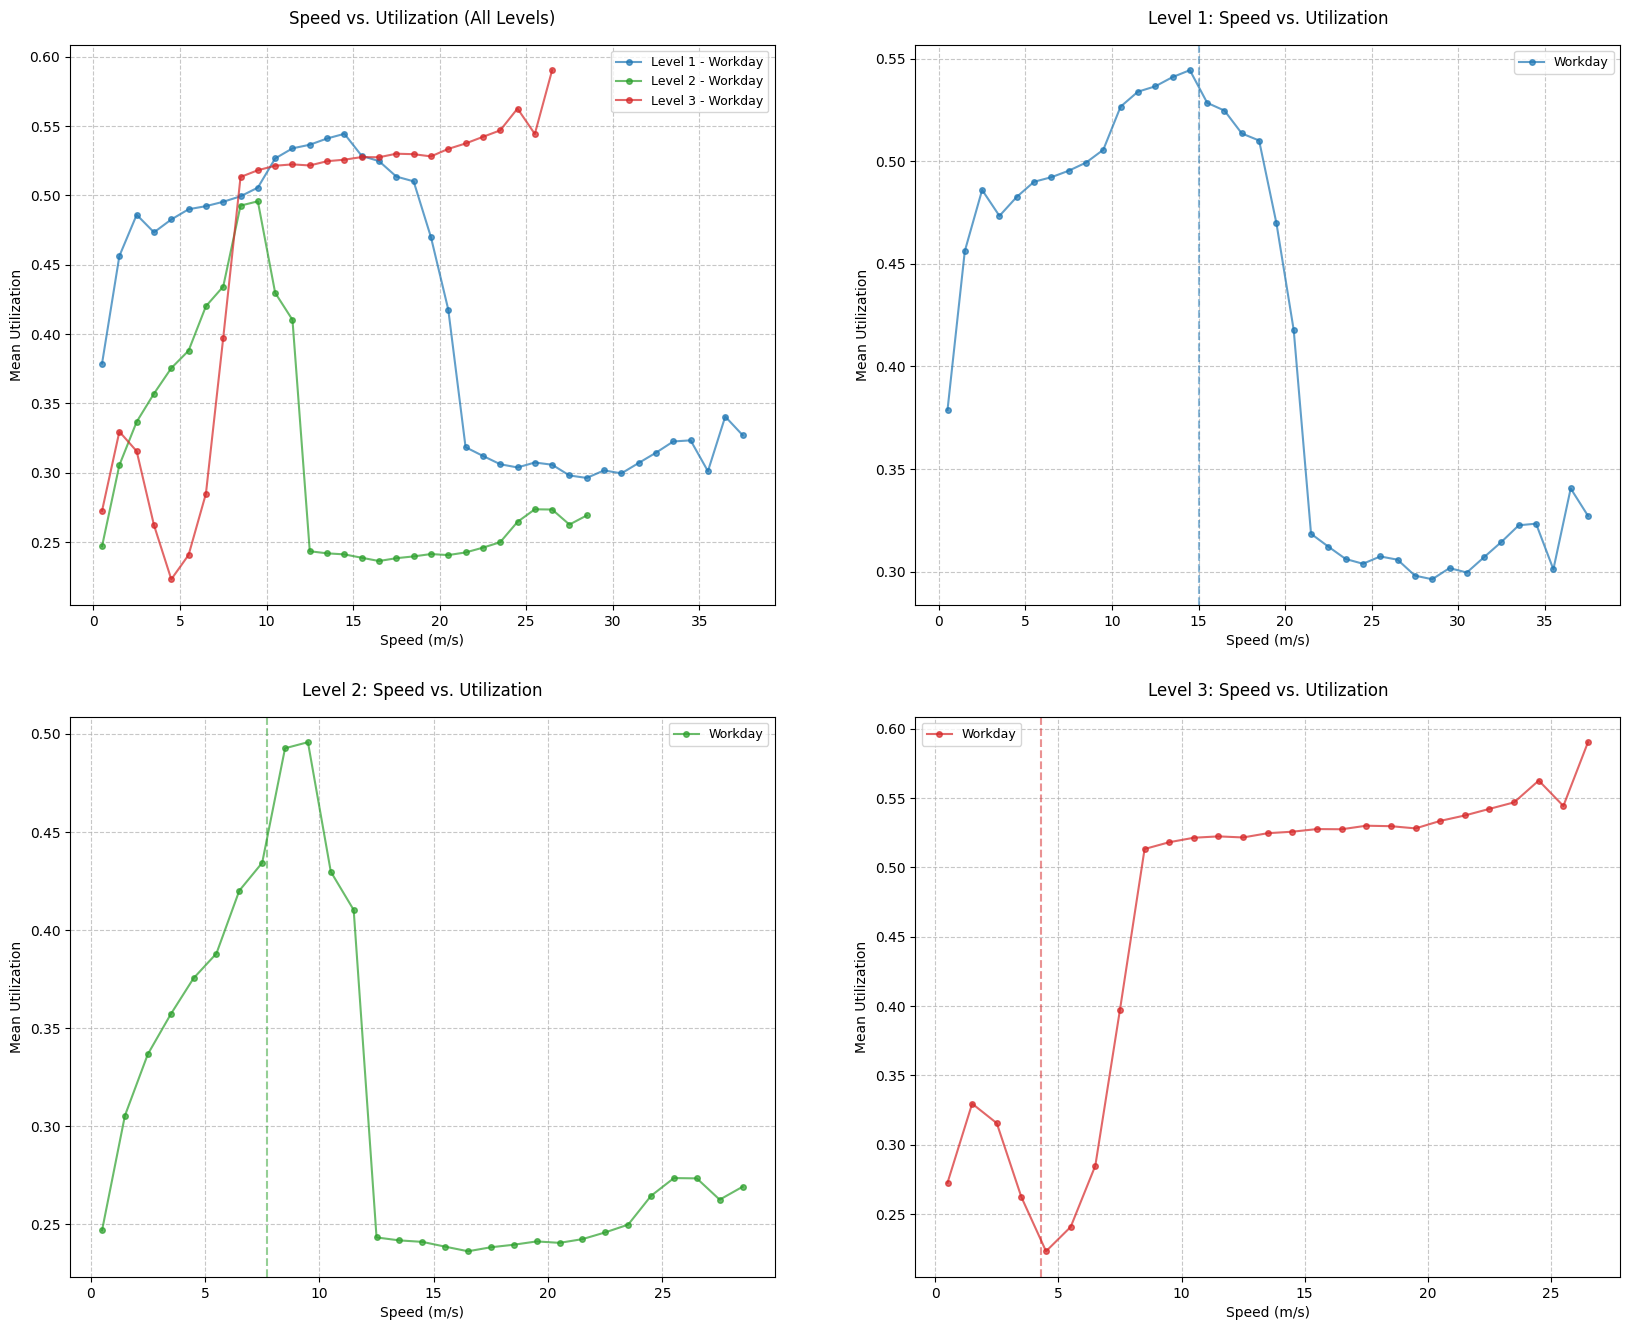

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.linear_model import LinearRegression

# def analyze_speed_utilization(workday_files, holiday_files, output_dir=None):
#     """
#     Analyze and plot speed vs. utilization relationships for all road levels.
#     """
#     fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
#     colors = {1: '#1f77b4', 2: '#2ca02c', 3: '#d62728'}
    
#     def process_file_in_chunks(file_path, chunk_size=100000):
#         """Process large CSV files in chunks"""
#         speed_bins = np.arange(0, 45, 1)  # Assuming max speed around 40 m/s
#         utilization_sum = np.zeros(len(speed_bins) - 1)
#         count = np.zeros(len(speed_bins) - 1)
#         free_flow_sum = 0
#         free_flow_count = 0
        
#         try:
#             for chunk in pd.read_csv(file_path, chunksize=chunk_size):
#                 # Process speed vs utilization
#                 for i in range(len(speed_bins) - 1):
#                     mask = (chunk['avg_speed'] >= speed_bins[i]) & (chunk['avg_speed'] < speed_bins[i + 1])
#                     utilization_sum[i] += chunk.loc[mask, 'utilization'].sum()
#                     count[i] += mask.sum()
                
#                 # Process free-flow speed
#                 free_flow_sum += chunk['vc'].sum()
#                 free_flow_count += len(chunk)
                
#             # Calculate means
#             mean_utilization = np.divide(utilization_sum, count, where=count > 0)
#             mean_free_flow = free_flow_sum / free_flow_count if free_flow_count > 0 else 0
            
#             return {
#                 'speed_bins': speed_bins[:-1] + 0.5,  # bin centers
#                 'mean_utilization': mean_utilization,
#                 'mean_free_flow': mean_free_flow,
#                 'valid_bins': count > 0
#             }
            
#         except Exception as e:
#             print(f"Error processing {file_path}: {str(e)}")
#             return None

#     # Process data for each level and day type
#     for day_type, files in [('Workday', workday_files)]: #, ('Holiday', holiday_files)
#         for level in [1, 2, 3]:
#             data = process_file_in_chunks(files[level])
#             if data is None:
#                 continue
            
#             # Get valid data points
#             valid_mask = data['valid_bins']
#             speed_bins = data['speed_bins'][valid_mask]
#             mean_util = data['mean_utilization'][valid_mask]
            
#             # Plot on appropriate axes
#             # Overall scatter (aggregated)
#             ax1.plot(speed_bins, mean_util, 
#                     c=colors[level], marker='o', markersize=4,
#                     label=f'Level {level} - {day_type}', alpha=0.7)
            
#             # Level-specific trends
#             if level == 1:
#                 ax2.plot(speed_bins, mean_util, 
#                         c=colors[level], marker='o', markersize=4,
#                         label=day_type, alpha=0.7)
#             elif level == 2:
#                 ax3.plot(speed_bins, mean_util,
#                         c=colors[level], marker='o', markersize=4,
#                         label=day_type, alpha=0.7)
#             else:
#                 ax4.plot(speed_bins, mean_util,
#                         c=colors[level], marker='o', markersize=4,
#                         label=day_type, alpha=0.7)
            
#             # Add free-flow speed line
#             if day_type == 'Workday':
#                 linestyle = '--'
#             else:
#                 linestyle = ':'
                
#             if level == 1:
#                 ax2.axvline(data['mean_free_flow'], color=colors[level],
#                            linestyle=linestyle, alpha=0.5)
#             elif level == 2:
#                 ax3.axvline(data['mean_free_flow'], color=colors[level],
#                            linestyle=linestyle, alpha=0.5)
#             else:
#                 ax4.axvline(data['mean_free_flow'], color=colors[level],
#                            linestyle=linestyle, alpha=0.5)

#     # Configure plots
#     ax1.set_title('Speed vs. Utilization (All Levels)', fontsize=12, pad=15)
#     ax1.set_xlabel('Speed (m/s)', fontsize=10)
#     ax1.set_ylabel('Mean Utilization', fontsize=10)
#     ax1.legend(fontsize=9)
#     ax1.grid(True, linestyle='--', alpha=0.7)

#     ax2.set_title('Level 1: Speed vs. Utilization', fontsize=12, pad=15)
#     ax2.set_xlabel('Speed (m/s)', fontsize=10)
#     ax2.set_ylabel('Mean Utilization', fontsize=10)
#     ax2.legend(fontsize=9)
#     ax2.grid(True, linestyle='--', alpha=0.7)

#     ax3.set_title('Level 2: Speed vs. Utilization', fontsize=12, pad=15)
#     ax3.set_xlabel('Speed (m/s)', fontsize=10)
#     ax3.set_ylabel('Mean Utilization', fontsize=10)
#     ax3.legend(fontsize=9)
#     ax3.grid(True, linestyle='--', alpha=0.7)

#     ax4.set_title('Level 3: Speed vs. Utilization', fontsize=12, pad=15)
#     ax4.set_xlabel('Speed (m/s)', fontsize=10)
#     ax4.set_ylabel('Mean Utilization', fontsize=10)
#     ax4.legend(fontsize=9)
#     ax4.grid(True, linestyle='--', alpha=0.7)

#     # Adjust layout
#     # plt.tight_layout()
    
#     # Save figure if output directory is provided
#     if output_dir:
#         try:
#             plt.savefig(f'{output_dir}/speed_utilization_analysis.png', 
#                        dpi=300, bbox_inches='tight', format='png')
#             print(f"Plot saved to {output_dir}/speed_utilization_analysis.png")
#         except Exception as e:
#             print(f"Error saving figure: {str(e)}")
    
#     plt.show()

# # Example usage:
# if __name__ == "__main__":
    
#     workday_files = {
#         1: output_dir + 'level1_road_history_workday_utilization_tune.csv',
#         2: output_dir + 'level2_road_history_workday_utilization_tune.csv',
#         3: output_dir + 'level3_road_history_workday_utilization_tune.csv'
#     }
    
#     # holiday_files = {
#     #     1: output_dir + 'level1_road_history_holiday_utilization_tune.csv',
#     #     2: output_dir + 'level2_road_history_holiday_utilization_tune.csv',
#     #     3: output_dir + 'level3_road_history_holiday_utilization_tune.csv'
#     # }
    
#     analyze_speed_utilization(workday_files, holiday_files, output_dir)

Processing Workday Level 1...

Statistics for Workday Level 1 (Time slots 42-55):

Correlations with Utilization:
Utilization: 1.000
Uq: 0.592
Uv: -0.118
Theta: 0.942

Means ± Standard Deviations:
Utilization: 0.496 ± 0.158
Uq: 1.033 ± 0.360
Uv: 0.854 ± 0.274
Theta: 1.286 ± 0.932
Processing Workday Level 2...

Statistics for Workday Level 2 (Time slots 42-55):

Correlations with Utilization:
Utilization: 1.000
Uq: 0.228
Uv: 0.265
Theta: 0.969

Means ± Standard Deviations:
Utilization: 0.404 ± 0.097
Uq: 0.680 ± 0.358
Uv: 0.860 ± 0.212
Theta: 1.236 ± 0.638
Processing Workday Level 3...

Statistics for Workday Level 3 (Time slots 42-55):

Correlations with Utilization:
Utilization: nan
Uq: nan
Uv: nan
Theta: nan

Means ± Standard Deviations:
Utilization: nan ± nan
Uq: 0.492 ± 0.404
Uv: nan ± nan
Theta: 0.438 ± 0.627
Processing Holiday Level 1...

Statistics for Holiday Level 1 (Time slots 42-55):

Correlations with Utilization:
Utilization: 1.000
Uq: 0.323
Uv: 0.030
Theta: 0.937

Means ± 

C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_29432\513776255.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


Plot saved to D:/Thesis/files_output_dir/output_utilization//correlation_matrices_time_42_55.png


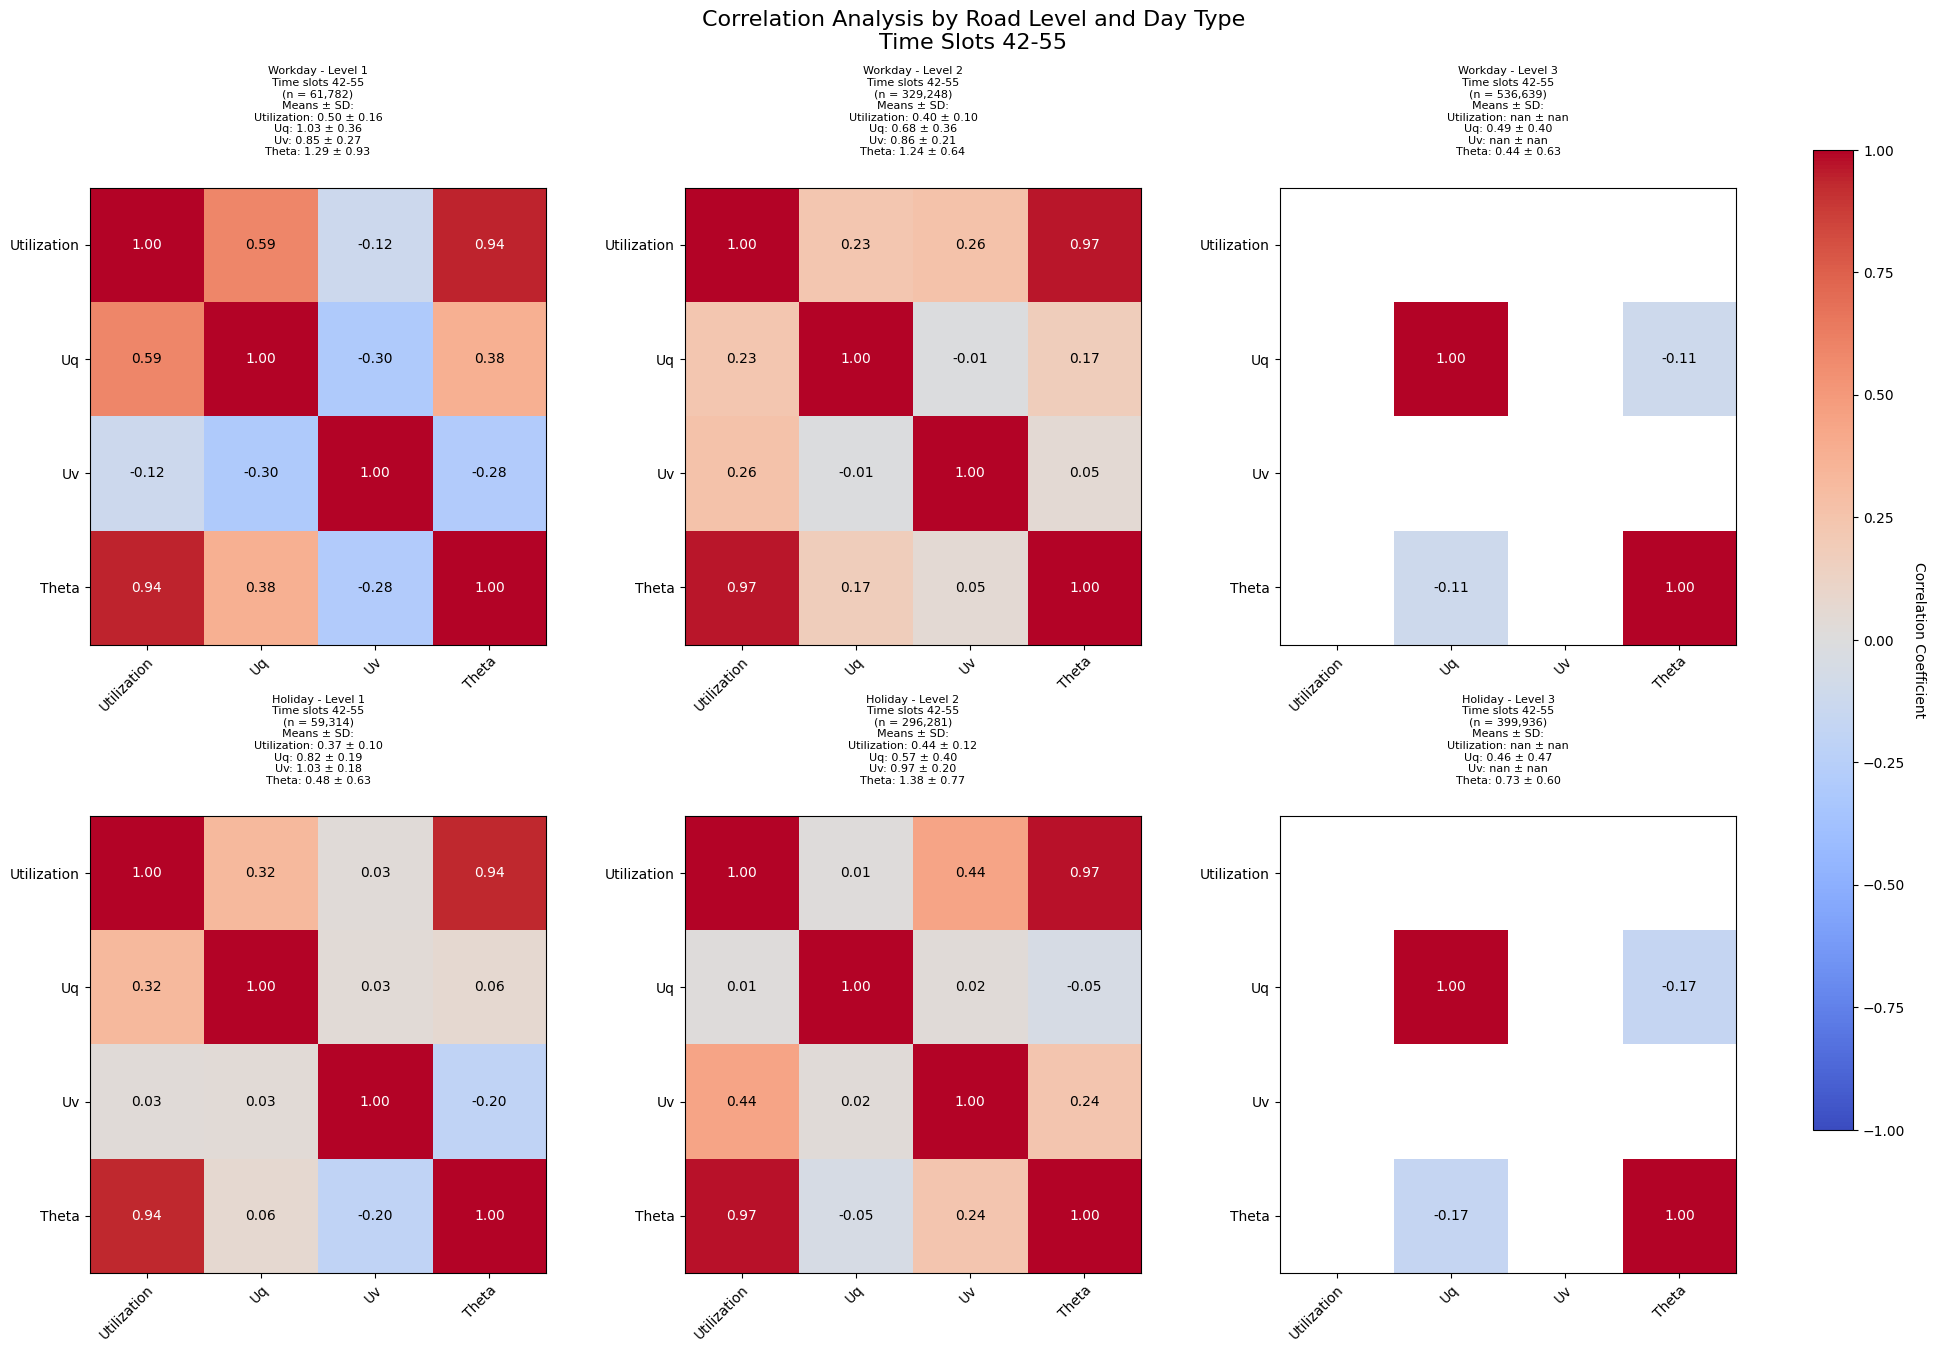

In [63]:
def analyze_correlations_separate(workday_files, holiday_files, output_dir=None):
    """
    Create separate correlation analyses for each level and day type,
    considering only time slots between 42 and 55.
    """
    def process_file_for_correlation(file_path, chunk_size=100000):
        """Process large CSV files in chunks for correlation analysis"""
        # Initialize matrices for correlation calculation
        sum_x = np.zeros(4)  # For means [utilization, Uq, Uv, theta]
        sum_xx = np.zeros((4, 4))  # For covariances
        n = 0
        
        column_names = ['utilization', 'Uq', 'Uv', 'theta']
        
        try:
            for chunk in pd.read_csv(file_path, chunksize=chunk_size):
                # Filter for specified time range
                chunk = chunk[chunk['time'].isin(range(42, 56))]
                
                if len(chunk) == 0:
                    continue
                
                # Extract relevant columns
                data = chunk[column_names].values
                
                # Update sums
                sum_x += np.sum(data, axis=0)
                sum_xx += data.T @ data
                n += len(data)
            
            if n > 0:
                # Calculate means
                means = sum_x / n
                
                # Calculate covariance matrix
                covariance = (sum_xx - np.outer(sum_x, sum_x) / n) / (n - 1)
                
                # Calculate correlation matrix
                std_devs = np.sqrt(np.diag(covariance))
                correlation = covariance / np.outer(std_devs, std_devs)
                
                return correlation, n, means, std_devs
                
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            return None, 0, None, None
        
        return None, 0, None, None

    def plot_correlation_matrix(correlation_matrix, title, ax, means=None, std_devs=None):
        """Helper function to create correlation heatmap"""
        # Plot heatmap
        im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        
        # Add labels
        variables = ['Utilization', 'Uq', 'Uv', 'Theta']
        ax.set_xticks(np.arange(len(variables)))
        ax.set_yticks(np.arange(len(variables)))
        ax.set_xticklabels(variables)
        ax.set_yticklabels(variables)
        
        # Rotate x-axis labels
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        # Add correlation values as text
        for i in range(len(variables)):
            for j in range(len(variables)):
                text = ax.text(j, i, f'{correlation_matrix[i, j]:.2f}',
                             ha="center", va="center", 
                             color="black" if abs(correlation_matrix[i, j]) < 0.7 else "white")
        
        # Add means and std devs as a subtitle if available
        if means is not None and std_devs is not None:
            subtitle = "Means ± SD:\n"
            for var, mean, std in zip(variables, means, std_devs):
                subtitle += f"{var}: {mean:.2f} ± {std:.2f}\n"
            ax.set_title(title + '\n' + subtitle, pad=15, size=8)
        else:
            ax.set_title(title, pad=15)
        
        return im

    # Create figure with subplots for each level and day type
    fig, axes = plt.subplots(2, 3, figsize=(20, 14))
    
    # Process files and create plots
    for day_type_idx, (day_type, files) in enumerate([('Workday', workday_files), ('Holiday', holiday_files)]):
        for level in [1, 2, 3]:
            print(f"Processing {day_type} Level {level}...")
            
            # Get correlation matrix
            correlation, n, means, std_devs = process_file_for_correlation(files[level])
            
            if correlation is not None and n > 0:
                # Plot correlation matrix
                title = f'{day_type} - Level {level}\nTime slots 42-55\n(n = {n:,})'
                im = plot_correlation_matrix(correlation, title, axes[day_type_idx, level-1], means, std_devs)
                
                # Print detailed statistics
                print(f"\nStatistics for {day_type} Level {level} (Time slots 42-55):")
                variables = ['Utilization', 'Uq', 'Uv', 'Theta']
                print("\nCorrelations with Utilization:")
                for i, var in enumerate(variables):
                    print(f"{var}: {correlation[0, i]:.3f}")
                
                if means is not None and std_devs is not None:
                    print("\nMeans ± Standard Deviations:")
                    for i, var in enumerate(variables):
                        print(f"{var}: {means[i]:.3f} ± {std_devs[i]:.3f}")
            else:
                print(f"No valid data for {day_type} Level {level}")
                axes[day_type_idx, level-1].text(0.5, 0.5, 'No Data Available',
                                               ha='center', va='center')
    
    # Add colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)
    
    # Add overall title
    fig.suptitle('Correlation Analysis by Road Level and Day Type\nTime Slots 42-55', 
                 fontsize=16, y=0.95)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    
    # Save figure if output directory is provided
    if output_dir:
        try:
            plt.savefig(f'{output_dir}/correlation_matrices_time_42_55.png', 
                       dpi=300, bbox_inches='tight', format='png')
            print(f"Plot saved to {output_dir}/correlation_matrices_time_42_55.png")
        except Exception as e:
            print(f"Error saving figure: {str(e)}")
    
    plt.show()

# Example usage:
if __name__ == "__main__":
     
    workday_files = {
        1: output_dir + 'level1_road_history_workday_utilization_tune.csv',
        2: output_dir + 'level2_road_history_workday_utilization_tune.csv',
        3: output_dir + 'level3_road_history_workday_utilization_tune.csv'
    }
    
    holiday_files = {
        1: output_dir + 'level1_road_history_holiday_utilization_tune.csv',
        2: output_dir + 'level2_road_history_holiday_utilization_tune.csv',
        3: output_dir + 'level3_road_history_holiday_utilization_tune.csv'
    }
    
    analyze_correlations_separate(workday_files, holiday_files, output_dir)

Processing Level 1...
Processing Level 2...
Processing Level 3...
Plot saved to D:/Thesis/files_output_dir/output_utilization//traffic_flow_relationships.png


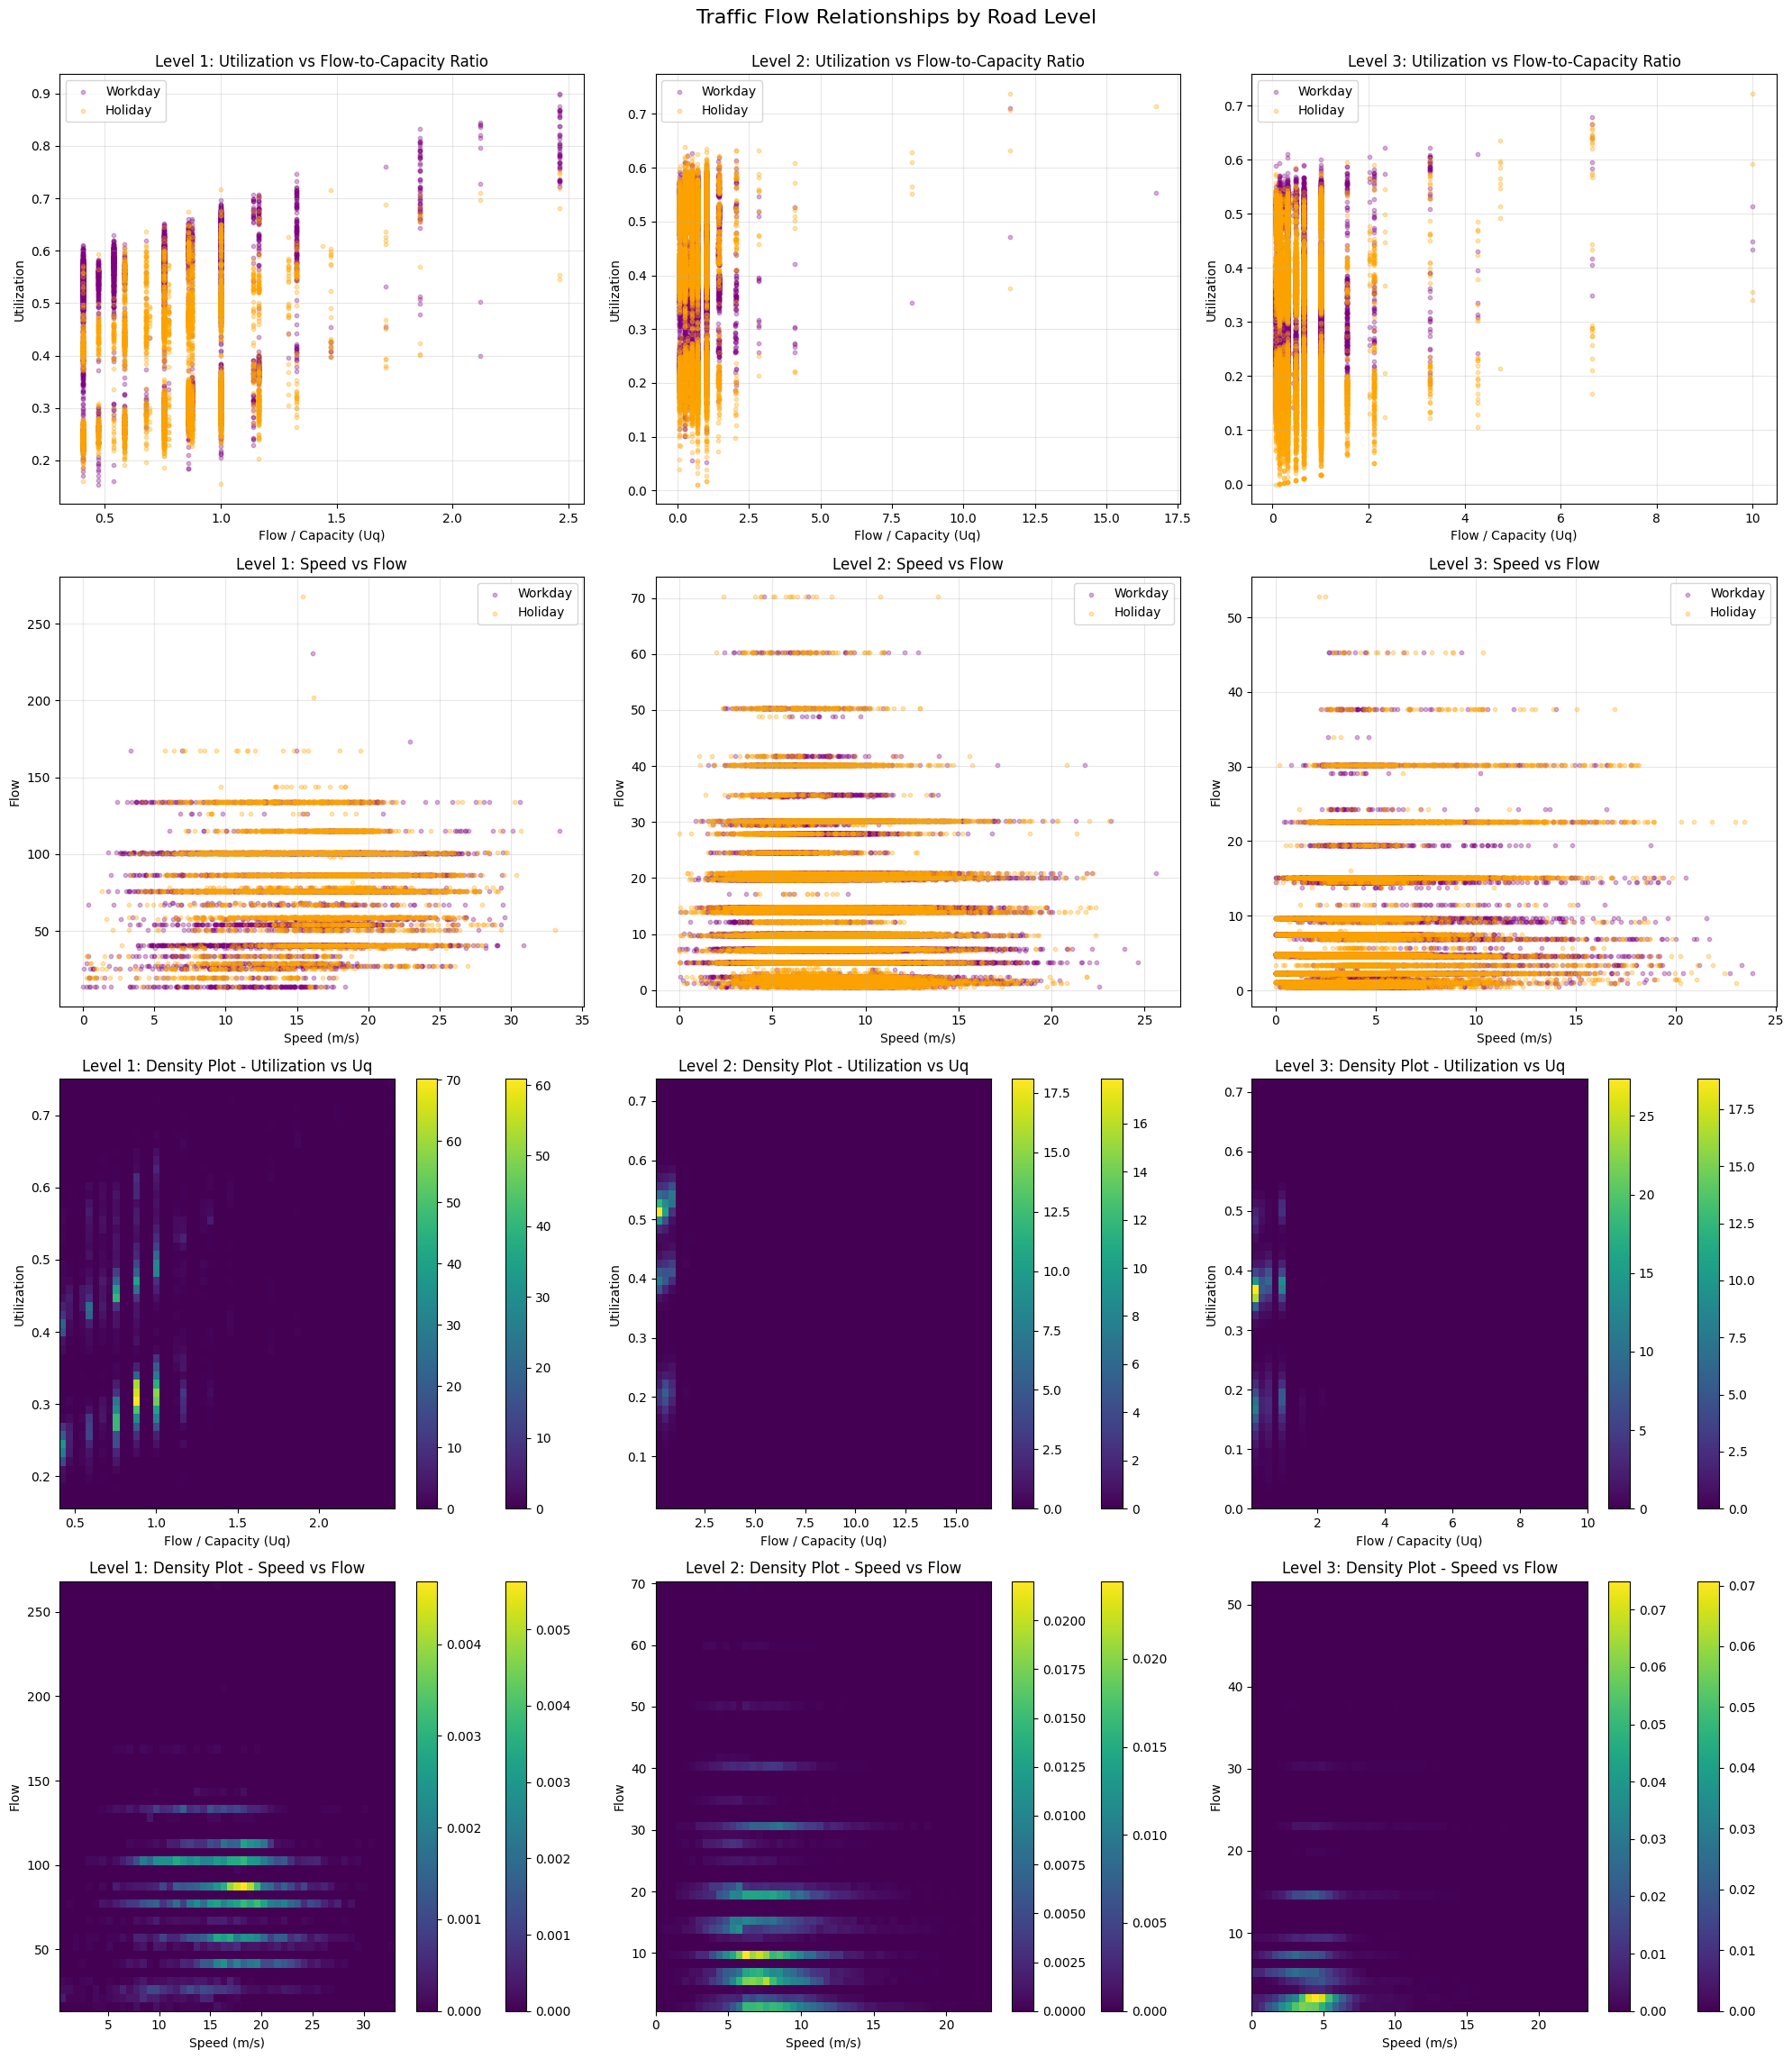


Summary Statistics:

Level 1 - Workday:
Utilization vs Uq correlation: 0.19935022700370653
Speed vs Flow correlation: 0.14255444646944146

Level 1 - Holiday:
Utilization vs Uq correlation: 0.23241450831934682
Speed vs Flow correlation: -0.025400520091651873

Level 2 - Workday:
Utilization vs Uq correlation: 0.14653837170346226
Speed vs Flow correlation: -0.1512858002141097

Level 2 - Holiday:
Utilization vs Uq correlation: -0.05434352777199317
Speed vs Flow correlation: -0.08857508993083651

Level 3 - Workday:
Utilization vs Uq correlation: 0.09176474995010474
Speed vs Flow correlation: 0.06929062317530628

Level 3 - Holiday:
Utilization vs Uq correlation: -0.0002581524259731242
Speed vs Flow correlation: 0.168146253288975


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_traffic_relationships(workday_files, holiday_files, output_dir=None):
    """
    Create scatter plots for utilization vs Uq and speed vs volume relationships.
    """
    def process_file_in_chunks(file_path, chunk_size=100000):
        """Process large CSV files in chunks"""
        data_points = {
            'Uq': [], 'utilization': [],
            'avg_speed': [], 'volume': []
        }
        
        try:
            for chunk in pd.read_csv(file_path, chunksize=chunk_size):
                # Sample the chunk to reduce memory usage (adjust rate as needed)
                if len(chunk) > 1000:
                    chunk = chunk.sample(n=1000)
                
                data_points['Uq'].extend(chunk['Uq'].values)
                data_points['utilization'].extend(chunk['utilization'].values)
                data_points['avg_speed'].extend(chunk['avg_speed'].values)
                data_points['volume'].extend(chunk['volume'].values)
                
            return data_points
            
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            return None

    # Create figure with subplots
    fig, axes = plt.subplots(4, 3, figsize=(20, 24))
    
    # Colors for different day types
    colors = {'Workday': 'purple', 'Holiday': 'orange'}
    
    # Process files and create plots
    for level in [1, 2, 3]:
        print(f"Processing Level {level}...")
        
        for day_type, files in [('Workday', workday_files), ('Holiday', holiday_files)]:
            data = process_file_in_chunks(files[level])
            
            if data is not None:
                # Plot Utilization vs Uq (first row)
                axes[0, level-1].scatter(data['Uq'], data['utilization'], 
                                       color=colors[day_type], alpha=0.3, 
                                       label=day_type, s=10)
                
                # Plot Speed vs Flow (second row)
                axes[1, level-1].scatter(data['avg_speed'], data['volume'], 
                                       color=colors[day_type], alpha=0.3, 
                                       label=day_type, s=10)
                
                # Add density estimation for Utilization vs Uq (third row)
                h = axes[2, level-1].hist2d(data['Uq'], data['utilization'],
                                          bins=50, cmap='viridis', density=True)
                plt.colorbar(h[3], ax=axes[2, level-1])
                
                # Add density estimation for Speed vs Flow (fourth row)
                h = axes[3, level-1].hist2d(data['avg_speed'], data['volume'],
                                          bins=50, cmap='viridis', density=True)
                plt.colorbar(h[3], ax=axes[3, level-1])

        # Configure plots for this level
        # First row (Utilization vs Uq)
        axes[0, level-1].set_title(f'Level {level}: Utilization vs Flow-to-Capacity Ratio')
        axes[0, level-1].set_xlabel('Flow / Capacity (Uq)')
        axes[0, level-1].set_ylabel('Utilization')
        axes[0, level-1].grid(True, alpha=0.3)
        axes[0, level-1].legend()

        # Second row (Speed vs Flow)
        axes[1, level-1].set_title(f'Level {level}: Speed vs Flow')
        axes[1, level-1].set_xlabel('Speed (m/s)')
        axes[1, level-1].set_ylabel('Flow')
        axes[1, level-1].grid(True, alpha=0.3)
        axes[1, level-1].legend()

        # Third row (Density plot Utilization vs Uq)
        axes[2, level-1].set_title(f'Level {level}: Density Plot - Utilization vs Uq')
        axes[2, level-1].set_xlabel('Flow / Capacity (Uq)')
        axes[2, level-1].set_ylabel('Utilization')

        # Fourth row (Density plot Speed vs Flow)
        axes[3, level-1].set_title(f'Level {level}: Density Plot - Speed vs Flow')
        axes[3, level-1].set_xlabel('Speed (m/s)')
        axes[3, level-1].set_ylabel('Flow')

    # Add overall title
    fig.suptitle('Traffic Flow Relationships by Road Level', 
                 fontsize=16, y=0.95)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save figure if output directory is provided
    if output_dir:
        try:
            plt.savefig(f'{output_dir}/traffic_flow_relationships.png', 
                       dpi=300, bbox_inches='tight', format='png')
            print(f"Plot saved to {output_dir}/traffic_flow_relationships.png")
        except Exception as e:
            print(f"Error saving figure: {str(e)}")
    
    plt.show()

    # Calculate and print summary statistics
    print("\nSummary Statistics:")
    for level in [1, 2, 3]:
        for day_type, files in [('Workday', workday_files), ('Holiday', holiday_files)]:
            data = process_file_in_chunks(files[level])
            if data is not None:
                print(f"\nLevel {level} - {day_type}:")
                print("Utilization vs Uq correlation:", 
                      np.corrcoef(data['Uq'], data['utilization'])[0,1])
                print("Speed vs Flow correlation:", 
                      np.corrcoef(data['avg_speed'], data['volume'])[0,1])

# Example usage:
if __name__ == "__main__":
    
    workday_files = {
        1: output_dir + 'level1_road_history_workday_utilization_tune.csv',
        2: output_dir + 'level2_road_history_workday_utilization_tune.csv',
        3: output_dir + 'level3_road_history_workday_utilization_tune.csv'
    }
    
    holiday_files = {
        1: output_dir + 'level1_road_history_holiday_utilization_tune.csv',
        2: output_dir + 'level2_road_history_holiday_utilization_tune.csv',
        3: output_dir + 'level3_road_history_holiday_utilization_tune.csv'
    }
    
    analyze_traffic_relationships(workday_files, holiday_files, output_dir)